In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# EDA

In [15]:
df=pd.read_excel('Data_Train.xlsx')

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
################################################################################################################
# IndiGo Analysis
################################################################################################################
df_indigo=df[df['Airline'] == 'IndiGo']
df_indigo

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,15/05/2019,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1 stop,No info,6037
10641,IndiGo,6/03/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info,7295
10649,IndiGo,1/03/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No info,4778
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823


In [18]:
df_indigo[["day", "month", "year"]] = df_indigo["Date_of_Journey"].str.split("/", expand = True)
df_indigo['year'] = df_indigo['year'].astype(int)
df_indigo['day'] = df_indigo['day'].astype(int)
df_indigo['month'] = df_indigo['month'].str.lstrip('0')


C:\Users\Pooja\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-18-b10a35dfbe06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indigo['year'] = df_indigo['year'].astype(int)
<ipython-input-18-b10a35dfbe06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [21]:
df_indigo['month'] = df_indigo['month'].astype(int)
df_indigo

<ipython-input-21-246d05d5200b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indigo['month'] = df_indigo['month'].astype(int)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,15/05/2019,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1 stop,No info,6037,15,5,2019
10641,IndiGo,6/03/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info,7295,6,3,2019
10649,IndiGo,1/03/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No info,4778,1,3,2019
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823,9,4,2019


In [29]:
#df_indigo_jan = df_indigo[df_indigo['month'] == 3]
print(max(df_indigo['month']))

6


In [ ]:
fig = plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
n, bins, patches = plt.hist(df_twitter.polarity)
plt.xticks(bins)
plt.ylabel('Number of users')
plt.xlabel('Polarity')
plt.xticks(rotation = 45)

In [214]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [215]:
#finding null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [216]:
#Dropping two null values
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [217]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [218]:
#Checking duplicate rows
df.duplicated().sum()

220

In [219]:
#Dropping 220 duplicate rows
df.drop_duplicates(inplace=True) 

#### Count of each airlines in the dataset

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:>

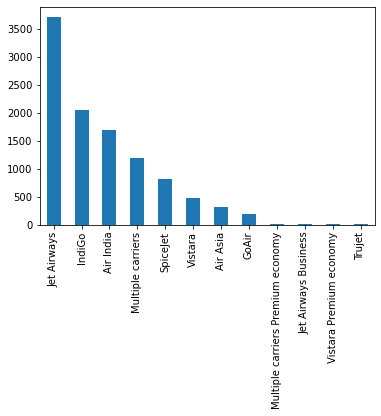

In [220]:
print(df['Airline'].value_counts())
df['Airline'].value_counts().plot(kind = 'bar') 

Jet Airways, Indigo and Air India have the highest number of flights scheduled

#### Frequency of each Source of the flights

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:>

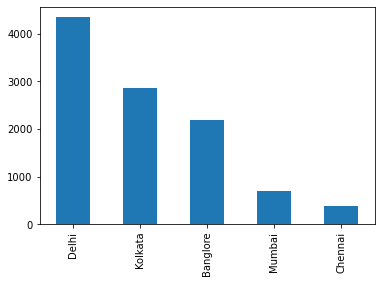

In [221]:
print(df['Source'] .value_counts())
df['Source'].value_counts().plot(kind = 'bar') 

Highest number of flights are departing from Delhi, followed by Kolkata and Bangalore

#### Frequency of the Destination cities

In [202]:
print(df['Destination'] .value_counts())

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     913
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


We have two destinations -  Delhi and New Delhi, and in source we have only Delhi. So, let's replace New Delhi as Delhi in the data

In [222]:
df['Destination'] = df['Destination'].replace('New Delhi' , 'Delhi')

<AxesSubplot:>

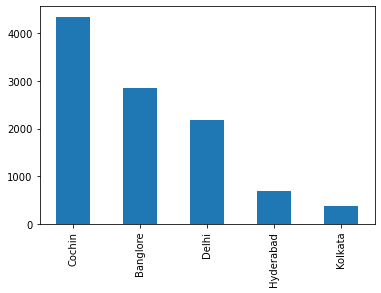

In [223]:
df['Destination'].value_counts().plot(kind = 'bar')

Cochin is the most travelled destination, followed by Bangalore annd Delhi

#### There are 5 kinds of stops in different routes

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


<AxesSubplot:>

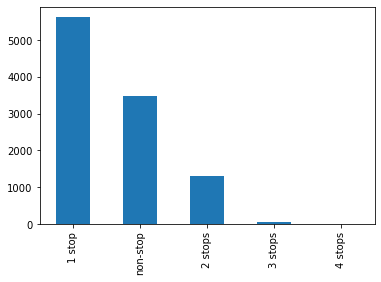

In [224]:
print(df['Total_Stops'] .value_counts())
df['Total_Stops'].value_counts().plot(kind = 'bar') 

There is only one data point for 4 stops, so we are removing that.

In [225]:
df = df[df['Total_Stops']!='4 stops']

#### Price of each airlines

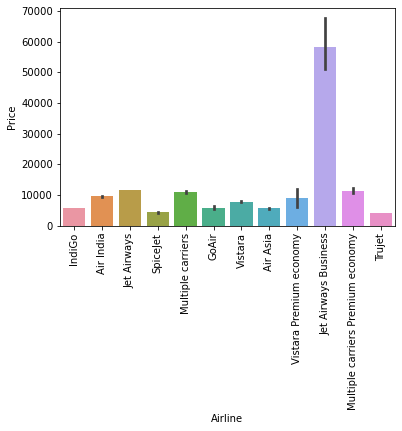

In [226]:
sns.barplot(x = 'Airline' , y = 'Price'  , data = df )  
plt.xticks(rotation = 90) 
plt.show()

#### Comparison of Price for different Source cities of flights

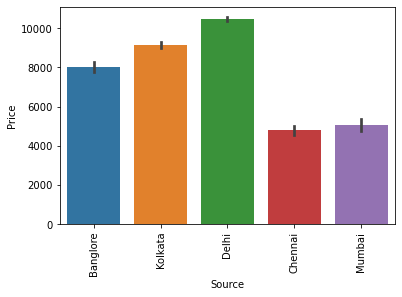

In [227]:
sns.barplot(x = 'Source' , y = 'Price'  , data = df )  
plt.xticks(rotation = 90) 
plt.show()

Flights from Delhi are the most expensive and flights from Chennai are least expensive

#### Comparison of Price for different Destination cities of flights

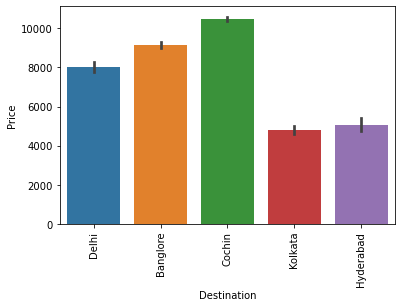

In [228]:
sns.barplot(x = 'Destination' , y = 'Price'  , data = df )  
plt.xticks(rotation = 90) 
plt.show()

Flights destinated to Cochin are most expensive and to Kolkata are least expensive

In [ ]:
#Converting Date_of_journey,Arrival_Time and Dep_Time into datetime object
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [231]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### Some data preprocessing

In [ ]:
#Extract day and month from Date_of_journey and stored in two other columns
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
# From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)
    
#Extracting values from Dep_time
extract_hour(df,'Dep_Time')
#extracting minutes
extract_min(df,'Dep_Time')
#drop the column
drop_col(df,'Dep_Time')

#Extracting values from Arrival_time
extract_hour(df,'Arrival_Time')
#extracting min
extract_min(df,'Arrival_Time')
#drop the column
drop_col(df,'Arrival_Time')

In [237]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [238]:
#Seperating duration hours and minute from Duration
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]
df['Duration']=duration

In [239]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

df['duration_hour']=df['Duration'].apply(hour)
df['duration_min']=df['Duration'].apply(minutes)

In [240]:
drop_col(df,'Duration')
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [241]:
df['duration_hour'] = df['duration_hour'].astype(int)
df['duration_min'] = df['duration_min'].astype(int)
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hour         int32
duration_min          int32
dtype: object

#### Correlation

<AxesSubplot:>

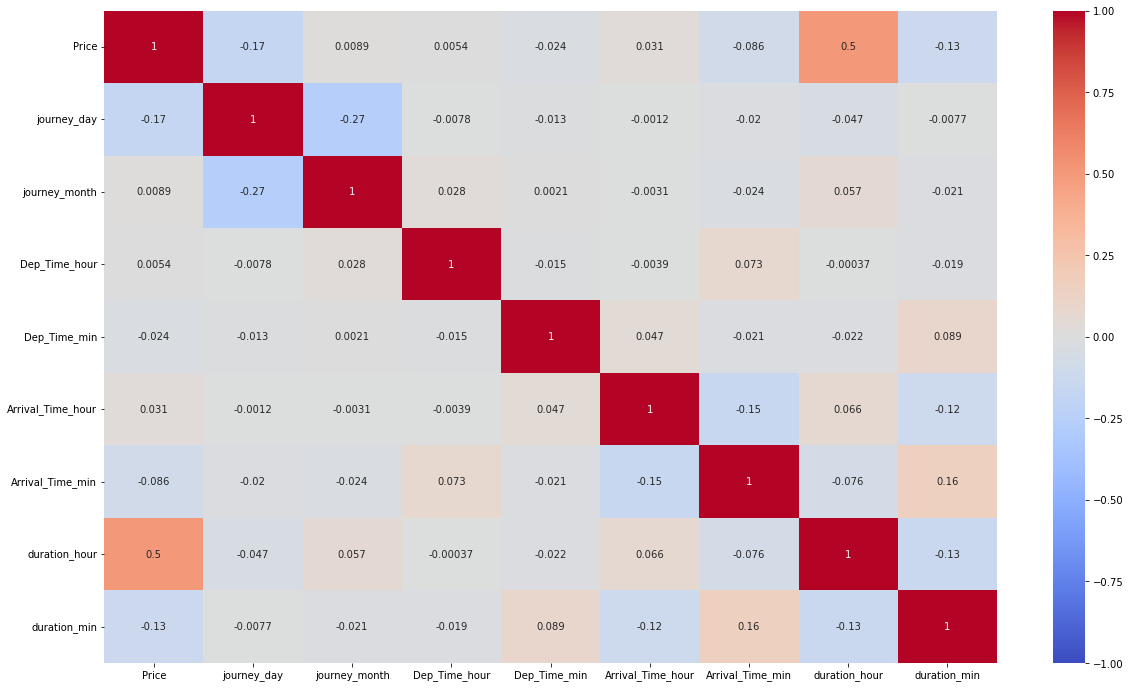

In [242]:
plt.figure(figsize= (20,12))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1 , robust = True ) 

In [281]:
#Finding Categorical values
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [282]:
#Finding continuous values
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'duration_hour',
 'duration_min']

### Encoding to covert Categorical data into some numerical format

We are using two main Encoding Techniques to covert Categorical data into some numerical format

Nominal data - Data that are not in any order - One Hot Encoding

Ordinal data - Data are in order - labelEncoder

In [283]:
categorical = df[column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info


In [284]:
categorical['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1693
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

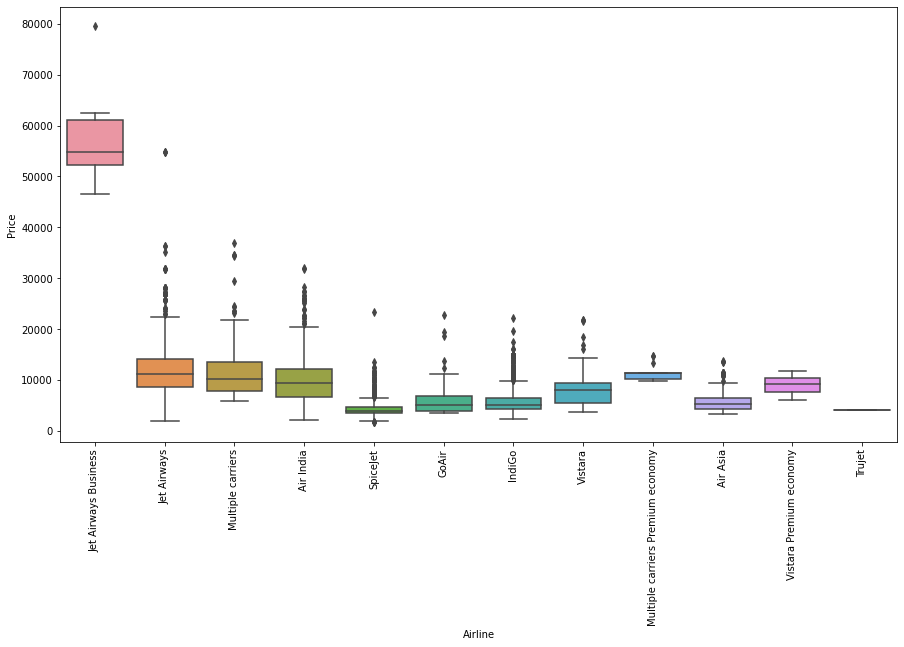

In [285]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

From graph we can see that Jet Airways have the highest Price and apart from that, almost all other airlines have a similar median.

#### Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

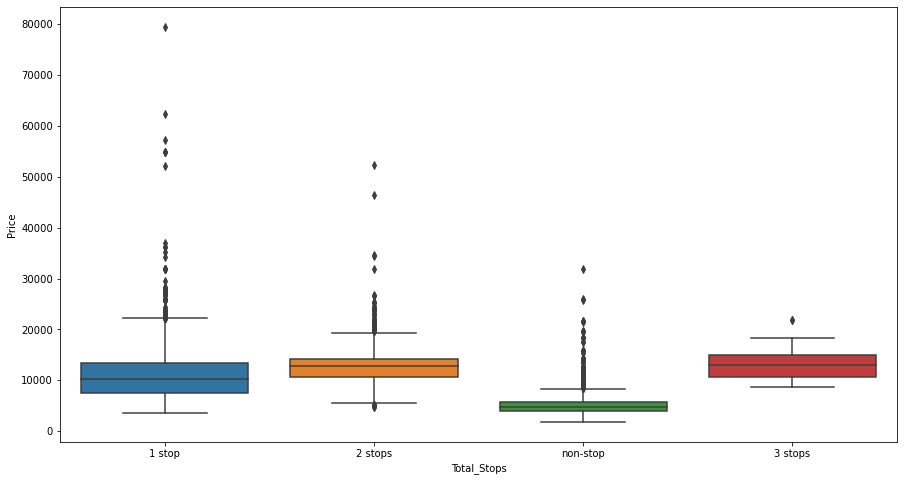

In [286]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [287]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [288]:
categorical['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2178
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### Source vs Price Analysis

<AxesSubplot:xlabel='Source', ylabel='Price'>

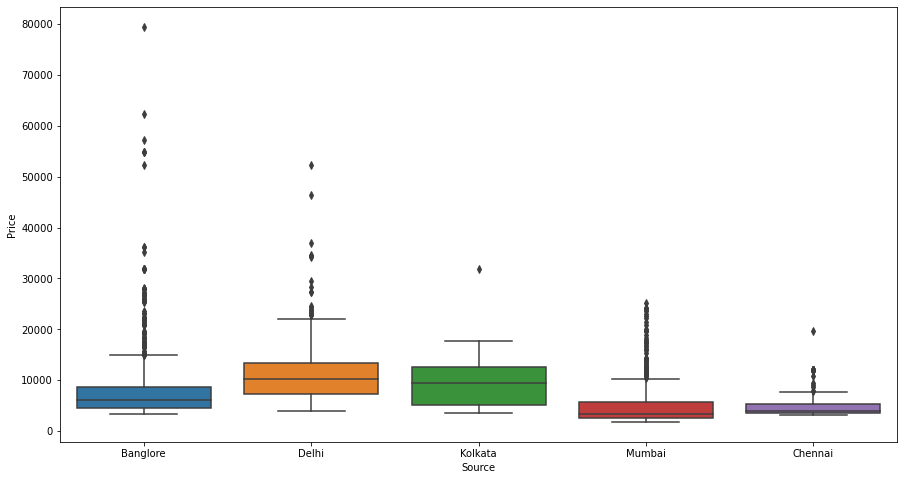

In [289]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [290]:
#OneHotEncoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [291]:
categorical['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        2178
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

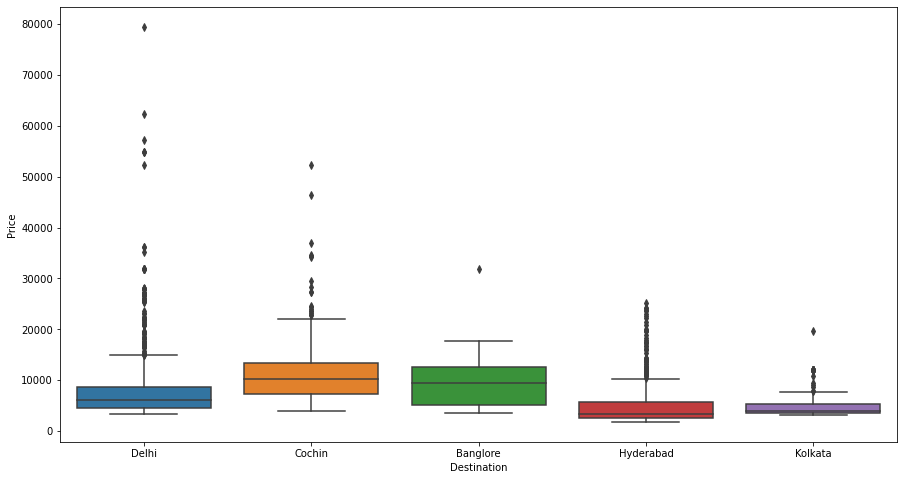

In [292]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [293]:
#OneHotEncoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [294]:
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 127, dtype: int64

In [ ]:
#encoding of route column
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [296]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
drop_col(categorical,'Route')

In [298]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3475
Route4              9100
Route5             10418
dtype: int64

In [299]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [301]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [302]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 5 categories
Total_Stops has total 4 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 5 categories


In [ ]:
# Applying label encoder for Routes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [304]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,non-stop,No info,0,13,29,13,4
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,4
4,IndiGo,Banglore,Delhi,1 stop,No info,0,34,8,13,4


In [ ]:
drop_col(categorical,'Additional_Info')

In [306]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops'], dtype=object)

In [ ]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [308]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10461, dtype: int64

In [ ]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

In [310]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [311]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Kolkata,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min
0,0,0,13,29,13,4,0,0,1,0,...,0,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,4,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,4,0,0,1,0,...,0,13302,3,1,16,50,21,35,4,45


#### Outliers

C:\Users\srush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


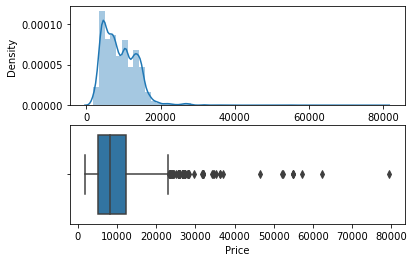

In [312]:
#Check for outliers
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
plot(final_df,'Price')

C:\Users\srush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


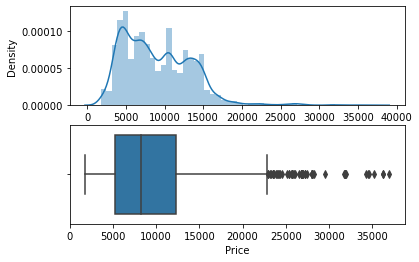

In [313]:
#Replace the outliers with median
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])
plot(final_df,'Price')

In [314]:
#Seperate the dataset in X and Y columns
X=final_df.drop('Price',axis=1)
y=df['Price']

### Feature Selection

In [315]:
from sklearn.feature_selection import mutual_info_classif

In [316]:
mutual_info_classif(X,y)

array([2.15820193, 2.05111258, 2.741338  , 2.30563629, 1.4026348 ,
       1.84405218, 0.75756884, 0.09953419, 0.70236801, 0.90424144,
       0.01717366, 0.61530669, 0.01333408, 0.32384899, 0.        ,
       0.22839467, 0.00675647, 0.18257167, 1.53916569, 0.87750999,
       0.29143031, 1.54157844, 0.72244814, 0.29467019, 0.15408938,
       1.05683376, 0.86086876, 1.39009054, 1.17471457, 1.84664181,
       1.5355795 , 1.76998673, 1.05675326])

In [129]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.104280
Route1,2.027368
Route2,2.795140
Route3,2.295441
Route4,1.434930
Route5,0.867436
Air India,0.770308
GoAir,0.096600
IndiGo,0.657608
Jet Airways,0.925406


In [317]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.795140
Route3,2.295441
Total_Stops,2.104280
Route1,2.027368
Arrival_Time_hour,1.873380
duration_hour,1.776804
Cochin,1.570914
Delhi,1.543837
Arrival_Time_min,1.527224
Route4,1.434930


As we can see from the table, few features have approx 0 value of importance, and we can remove it. But for now, we are not removing it.

### Machine Learning Models

In [318]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [319]:
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)  

In [320]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
res=pd.DataFrame(a)
res.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


#### Importing libraries required for running the models

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [322]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
bg = BaggingRegressor()
ran = RandomForestRegressor()
svr = SVR()
xgr = xgb.XGBRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
etr = ExtraTreesRegressor()
re=Ridge()
lin_lasso=linear_model.Lasso(alpha=0.1)

In [323]:
m=[lr, dt, bg, ran]

### Training and Testing to see perfomrance of each model

In [324]:
for models in m:
    
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)    
    print('Model: ', models)
    
    # Printing Performance Metrics for each model
    print('Model Name: ', models)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    
    
    # Storing the metrics in res
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : metrics.mean_squared_error(y_test, y_pred),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    res = res.append(new_row, ignore_index=True)

Model:  LinearRegression()
Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1959.198
Mean Squared Error (MSE): 7340959.231
Root Mean Squared Error (RMSE): 2709.42
R2_score: 0.627753
Root Mean Squared Log Error (RMSLE): 7.904
Mean Absolute Percentage Error (MAPE): 7340959.231
Adjusted R Square:  0.626575
------------------------------------------------------------------------------------------------------------
Model:  DecisionTreeRegressor()
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1687.937
Mean Squared Error (MSE): 6808224.29
Root Mean Squared Error (RMSE): 2609.257
R2_score: 0.654767
Root Mean Squared Log Error (RMSLE): 7.867
Mean Absolute Percentage Error (MAPE): 6808224.29
Adjusted R Square:  0.653674
------------------------------------------------------------------------------------------------------------


C:\Users\srush\AppData\Local\Temp\ipykernel_13120\3986559112.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(new_row, ignore_index=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_13120\3986559112.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(new_row, ignore_index=True)


Model:  BaggingRegressor()
Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1307.555
Mean Squared Error (MSE): 4203906.195
Root Mean Squared Error (RMSE): 2050.343
R2_score: 0.786827
Root Mean Squared Log Error (RMSLE): 7.626
Mean Absolute Percentage Error (MAPE): 4203906.195
Adjusted R Square:  0.786152
------------------------------------------------------------------------------------------------------------


C:\Users\srush\AppData\Local\Temp\ipykernel_13120\3986559112.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(new_row, ignore_index=True)


Model:  RandomForestRegressor()
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1287.327
Mean Squared Error (MSE): 3997281.468
Root Mean Squared Error (RMSE): 1999.32
R2_score: 0.797305
Root Mean Squared Log Error (RMSLE): 7.601
Mean Absolute Percentage Error (MAPE): 3997281.468
Adjusted R Square:  0.796663
------------------------------------------------------------------------------------------------------------


C:\Users\srush\AppData\Local\Temp\ipykernel_13120\3986559112.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(new_row, ignore_index=True)


### Models and their Performances

In [325]:
res

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),1959.198280,0.626575,2709.420460,7.340959e+06,7.340959e+06,7.904490,0.627753
1,DecisionTreeRegressor(),1687.937490,0.653674,2609.257421,6.808224e+06,6.808224e+06,7.866821,0.654767
2,(DecisionTreeRegressor(random_state=1660288316...,1307.555058,0.786152,2050.342946,4.203906e+06,4.203906e+06,7.625762,0.786827
3,"(DecisionTreeRegressor(max_features='auto', ra...",1287.326793,0.796663,1999.320251,3.997281e+06,3.997281e+06,7.600563,0.797305


Random Forest Regressor performs the best with 79.7% accuracy

### Hypertuning the model

In [326]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [327]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 180, 'max_features': 'auto', 'max_depth': 15}

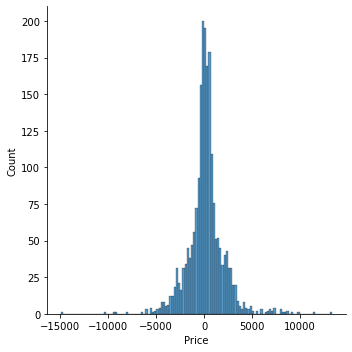

In [328]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [329]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2_score:', round(metrics.r2_score(y_test, prediction),6))

MAE: 1248.5249119854698
MSE: 3593916.940472411
RMSE: 1895.7628914166485
R2_score: 0.817759


After tuning, the accuracy of the model has improved and it is 81.7%